<a href="https://colab.research.google.com/github/toche7/mdsLab5/blob/main/Colab7_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab. 7 Model Development

ขั้นตอนในการทำพัฒนาแบบจำลองสามารถแบ่งได้ 2 ขั้นตอนดังนี้

1. ขั้นตอนการประเมินแบบจำลอง \(Model Validation\)
2. ขั้นตอนการคัดเลือกแบบจำลอง \(Model Selection\)



## 7.1 Model Validation

ในการประเมินแบบจำลอง หมายถึงกระบวนการในการวัดประสิทธิภาพของแบบจำลอง เพื่อที่จะใช้ในกระบวนการคัดเลือกหรือเปรียบเทียบประสิทธิภาพระหว่างแบบจำลองซึ่งสามารถทำได้สองวิธีดังนี้

1. Hold\-Out Method
2. Cross\-Validation Method

https://scikit-learn.org/stable/modules/cross_validation.html


### 7.1.1 Hold\-Out Method



![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*iZpmWiVeFn0bcuMZ_yiEdw.jpeg)


Theory

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#




```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

```




ตัวแปรสำคัญในการใช้คำสั่ง
* *arrarys: ข้อมูลที่ใช้ในการแบ่งสามารถใส่เข้ามาหลายๆ ชุดพร้อมกัน ได้
* test_size: float หรือ int, default = None, ถ้าเป็น 0.0-1 ก็จะทำการแบ่งข้อมูลไปตามขนาดสัดส่วนของ test_size และส่วนที่เหลือจะไปเป็น train set ถ้าเป็นจำนวนเต็มก็จะหมายถึงค่าจำนวนข้อมูลที่จะแบ่งไป   แต่ถ้าเป็น None ก็จะกำหนดให้กำหนดเป็น 0.25
* train_size: float หรือ int, default = None, จะเป็นข้อมูลส่วนจะนำไปฝึกแบบจำลอง โดยจะเป็นแบ่งตามค่า float ที่กำหนด ถ้าเป็นเลขจำนวนเต็มก็จะกำหนดค่าตามนั้น ถ้าเป็น none ก็จะใช้ส่วนที่เหลือจาก test set มาใช้
* random_state: int, default = None, กำหนดค่า seed ให้กับตัวกำสร้าง random โดยค่านี้จะถูกใช้ในการทำ  shuffle ข้อมูลที่จะทำก่อนการแบ่ง


โดยจะส่งค่ากลับมา list ที่แบ่งออกเป็นสองส่วนแล้ว

### Example 1

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split


In [62]:
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [63]:
list(y)

[0, 1, 2, 3, 4]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.33, random_state=42)

### Example 2

* "from" จะให้กำหนดเป้าหมายในการดึง module ออกมา
* "import" เป็นนำเข้า model เข้ามา
* "as" เป็นการตั้งชื่อเล่น เพื่อจะเรียกให้ง่ายขึ้น


``` python
import sklearn as sk
from sklearn.model_selection import train_test_split as tt
```



In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)


In [67]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [68]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
Acc = clf.score(X_test, y_test)

print('size X_train: ', X_train.shape)
print('size X_test: ', X_test.shape)
print('Acc: %.4f' % Acc )

size X_train:  (105, 4)
size X_test:  (45, 4)
Acc: 0.9778


#### ผลกระทบของการ random state และขนาดของการแบ่งข้อมูล

In [69]:
n = 10
size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=None)
print('size X_train: ', X_train.shape)
print('size X_test: ', X_test.shape)
for i in range(1,n):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=None)
  clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
  Acc = clf.score(X_test, y_test)
  print('Acc: %.4f' % Acc )


size X_train:  (135, 4)
size X_test:  (15, 4)
Acc: 1.0000
Acc: 1.0000
Acc: 0.9333
Acc: 1.0000
Acc: 1.0000
Acc: 1.0000
Acc: 1.0000
Acc: 1.0000
Acc: 0.9333


#### ทดลอง
ทดลองปรับค่า  test_size ไปเป็น ค่าอื่น เช่น 0.3, 0.2, 0.1 และทดลองปรับค่า random_state = None'

### 7.1.2 Cross\-Validation Method



![](https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/5-fold-cv.jpeg)


Theory

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html




``` python
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelObject, X, y, cv= 5, scoring = 'f1_macro')
```



ตัวแปรแบบที่สำคัญ
* modelObject คือตัว object ของ model ที่จะใช้ในการประเมิน
* X,y คือชุดข้อมูลที่จะทำการประเมิน
* cv คือจำนวนการแบ่งข้อมูลที่จะทำการ cross validation
* scoring คือค่าการวัดที่จะทำการตรวจสอบด้วย cross validatoin โดยสามารถดูได้จาก  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### Example 3

In [70]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)


In [71]:
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [72]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


ทดลองเปลี่ยนค่า scoring

In [73]:
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')  # defined the score types
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

#### ทดลอง
ทดลองปรับค่า fold  (cv) ไปเป็น 10 fold ให้  score เป็น ‘precision’  แบบ  micro average แล้วทำการวัดผลอีกครั้ง

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

โดยหลักการแล้วนั้น  Cross\-Validation จะให้ความน่าเชื่อถือมากกว่าการใช้ Hold\-Out Method  ส่วนวิธีการ Hold\-Out Method ก็จะมีข้อดีในเรื่องของความเร็วในการประมวลผล โดยส่วนใหญ่แล้วถ้าการทดสอบไหนที่แบบจำลองมีขนาดใหญ่ หรือปริมาณข้อมูลขนาดใหญ่เราจะนิยมใช้เป็น Hold\-Out Method เช่นงานทางด้าน image processing และ  NLP เป็นต้น  ส่วนการทดลองใดที่สามารถทำได้เร็วก็จะนิยมทำด้วยวิธี Cross\-Validation



## 7.2 Model Selection

ในข้อมูลชุดหนึ่งนั้นเราสามารถที่จะสร้างแบบจำลองได้หลายประเภท โดยในแต่ละประเภทเราสามารถสร้างแบบจำลองที่แตกต่างด้วยการปรับพารามิเตอร์ที่เกี่ยวข้องให้แตกต่างกันออกไป สิ่งที่ได้ก็คือเราจะได้โมเดลที่มีประสิทธิภาพแตกต่างกันหลังจากนั้นเราจะเลือกเอาโมเดลที่มีประสิทธิภาพมากที่สุดไปใช้งาน

Hyperparameter Turing หมายถึงกระบวนการปรับพารามิเตอร์ที่เกี่ยวข้องเพื่อให้ได้ประสิทธิภาพมากที่สุด โดยจะต้องมีการทดสอบพารามิเตอร์ที่แตกต่างกันแล้วเอาค่าที่ดีที่สุดไปใช้งาน

https://scikit-learn.org/stable/modules/grid_search.html

การเลือกแบบจำลองนอกจากจะเลือกจากแบบจำลองชนิดเดียวกันแล้วเรายังจะต้องเปรียบเทียบแบบจำลองที่เป็นคนละชนิดกันโดยจะเปรียบเทียบแบบจำลองที่แตกต่างกันที่มีการเลือกพารามิเตอร์ที่ดีที่สุดออกมาแล้ว

Theory

https://scikit-learn.org/stable/modules/grid_search.html#grid-search


Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV





```python
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(modelObject, parameters, cv = 5)
gridSearch.fit(X, y)

```



| Method | Description |
| :------------ | :---------------------------------------------------------- |
| fit\(X, y \) | Fit the model according to the given training data. |


ตัวแปรแบบที่สำคัญ
* modelObject คือตัว object ของ model ที่จะใช้ในการประเมิน
* X,y คือชุดข้อมูลที่จะทำการประเมิน
* cv คือจำนวนการแบ่งข้อมูลที่จะทำการ cross validation
* scoring คือค่าการวัดที่จะทำการตรวจสอบด้วย cross
* parameters เป็น dictionary ของตัวแปรที่จะนำไปทำการค้นหา

### Example 4
Grid Search Cross-Validation with Support Vector Machine

In [74]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
X,y = datasets.load_iris(return_X_y=True)

parameters = {'kernel':['linear', 'rbf'], 'C':[1,2,3,4]}

svc = svm.SVC()

gS = GridSearchCV(svc, parameters, cv = 5, scoring =  None)
gS.fit(X, y)
sorted(gS.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [75]:
gS.cv_results_

{'mean_fit_time': array([0.00079007, 0.00077252, 0.00083318, 0.00076447, 0.00159669,
        0.00129972, 0.00093632, 0.00085955]),
 'std_fit_time': array([1.14365831e-04, 4.64196504e-05, 2.39479879e-04, 8.66571479e-05,
        6.50133586e-04, 4.67022015e-05, 1.92389547e-04, 2.95567712e-04]),
 'mean_score_time': array([0.000595  , 0.0005785 , 0.0005877 , 0.0004962 , 0.00094285,
        0.00101967, 0.00078626, 0.00057936]),
 'std_score_time': array([1.15524329e-04, 9.06824180e-05, 1.39437247e-04, 6.80291393e-06,
        3.45328143e-04, 2.44773449e-04, 3.93513643e-04, 1.59118852e-04]),
 'param_C': masked_array(data=[1, 1, 2, 2, 3, 3, 4, 4],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                    'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=np.str_('?'),
             d

In [76]:
gS.best_estimator_

SVC(C=1, kernel='linear')

In [77]:
gS.best_score_

np.float64(0.9800000000000001)

In [78]:
gS.best_params_

{'C': 1, 'kernel': 'linear'}

In [79]:
gS.best_estimator_.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [80]:
gS.best_estimator_.score(X,y)

0.9933333333333333

In [81]:
import matplotlib.pyplot as plt
import numpy as np

(0.9, 1.0)

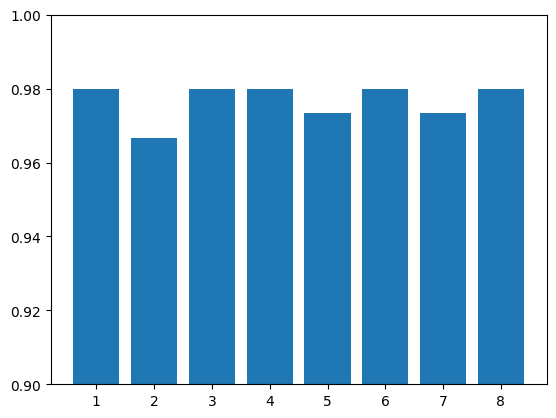

In [82]:
plt.bar(np.arange(1,9), gS.cv_results_['mean_test_score'])
plt.ylim(0.9, 1)

## Example 5

Grid Search Cross-Validation with Decision Tree Model

In [83]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
X,y = datasets.load_iris(return_X_y= True)


In [84]:
parameters = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':[2,3,4,5,6,7,8,9,10]}
mTree =  DecisionTreeClassifier()

In [85]:
gS = GridSearchCV(mTree, parameters, cv = 5)

In [86]:
gS.fit(X,y)
sorted(gS.cv_results_.keys())

/home/codespace/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [87]:
gS.cv_results_['mean_test_score']

array([0.93333333, 0.97333333, 0.96666667, 0.96666667, 0.96      ,
       0.95333333, 0.96666667, 0.95333333, 0.96666667, 0.93333333,
       0.96      , 0.95333333, 0.95333333, 0.96      , 0.96      ,
       0.95333333, 0.95333333, 0.95333333, 0.93333333, 0.96      ,
       0.95333333, 0.95333333, 0.95333333, 0.95333333, 0.95333333,
       0.95333333, 0.95333333])

In [88]:
gS.cv_results_['params']

[{'criterion': 'gini', 'max_depth': 2},
 {'criterion': 'gini', 'max_depth': 3},
 {'criterion': 'gini', 'max_depth': 4},
 {'criterion': 'gini', 'max_depth': 5},
 {'criterion': 'gini', 'max_depth': 6},
 {'criterion': 'gini', 'max_depth': 7},
 {'criterion': 'gini', 'max_depth': 8},
 {'criterion': 'gini', 'max_depth': 9},
 {'criterion': 'gini', 'max_depth': 10},
 {'criterion': 'entropy', 'max_depth': 2},
 {'criterion': 'entropy', 'max_depth': 3},
 {'criterion': 'entropy', 'max_depth': 4},
 {'criterion': 'entropy', 'max_depth': 5},
 {'criterion': 'entropy', 'max_depth': 6},
 {'criterion': 'entropy', 'max_depth': 7},
 {'criterion': 'entropy', 'max_depth': 8},
 {'criterion': 'entropy', 'max_depth': 9},
 {'criterion': 'entropy', 'max_depth': 10},
 {'criterion': 'log_loss', 'max_depth': 2},
 {'criterion': 'log_loss', 'max_depth': 3},
 {'criterion': 'log_loss', 'max_depth': 4},
 {'criterion': 'log_loss', 'max_depth': 5},
 {'criterion': 'log_loss', 'max_depth': 6},
 {'criterion': 'log_loss', 'max

In [89]:
gS.cv_results_['rank_test_score']

array([25,  1,  2,  2,  6, 11,  2, 11,  2, 25,  9, 11, 11,  6,  6, 11, 11,
       11, 25,  9, 11, 11, 11, 11, 11, 11, 11], dtype=int32)

(0.9, 1.0)

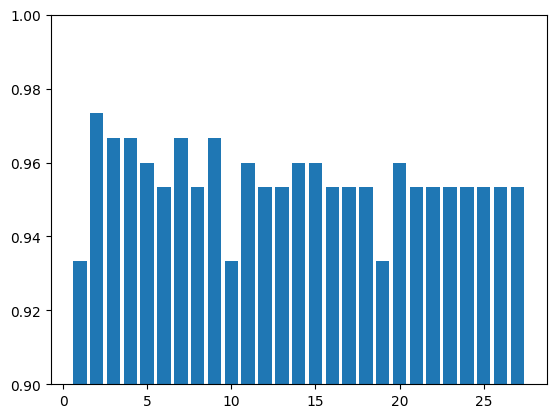

In [90]:
import matplotlib.pyplot as plt
plt.bar(np.arange(1,28), gS.cv_results_['mean_test_score'])
plt.ylim(0.9, 1)

In [91]:
gS.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [92]:
gS.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [93]:
gS.best_score_

np.float64(0.9733333333333334)

In [94]:
gS.best_estimator_.score(X,y)

0.9733333333333334

#### ตอบคำถาม
จากการทดลองนี้ model ใดดีที่สุด

## Exercise 1

สร้าง Model 3 ประเภท ประกอบด้วย Decision Tree, Neural Network, KNN 
ทำการปรับปจูน prarameter ของทั้ง 3 model ให้มีค่าสูงกว่า 0.92 
ทำการเลือกว่า model ใดที่สุด

In [95]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

X,y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [96]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_d = {'criterion':['gini', 'entropy','log_loss'],'max_depth':[4,5,6,7,8,9,10]}

d_model = DecisionTreeClassifier()

gS_d = GridSearchCV(d_model, param_d, cv = 5)

gS_d.fit(X,y)

gS_d.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [97]:
gS_d.best_params_


{'criterion': 'entropy', 'max_depth': 9}

In [98]:
gS_d.best_score_

np.float64(0.9385033379909953)

In [99]:
gS_d.best_estimator_.score(X,y)

1.0

In [100]:
# NN
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier()
param_NN = {'hidden_layer_sizes':[(10,),(20,),(30,),(40,),(50,),(60,)], 'max_iter': [500,1000]}

In [101]:
gS_NN = GridSearchCV(NN_model, param_NN, cv = 5)

gS_NN.fit(X,y)

gS_NN.best_estimator_



/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)

In [102]:
gS_NN.best_params_

{'hidden_layer_sizes': (50,), 'max_iter': 500}

In [103]:
gS_NN.best_score_    # เราใช้ตัวนี้ตัดสิน  

np.float64(0.9332091290172334)

In [104]:
gS_NN.best_estimator_.score(X,y)  #ไม่ใช้ตัวนี้เพราะเอาข้อมูล train มาใช้ด้วย จึงทำให้มีค่ามาก

0.9490333919156415

In [105]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
param_KNN = {'n_neighbors':[3,4,5,6,7,8,9,10]}

In [106]:
gS_KNN = GridSearchCV(KNN_model, param_KNN, cv = 5)

gS_KNN.fit(X,y)

gS_KNN.best_estimator_


KNeighborsClassifier(n_neighbors=9)

In [107]:
gS_KNN.best_score_

np.float64(0.9314702685918336)

In [108]:
gS_KNN.best_estimator_.score(X,y)

0.9420035149384886

In [ ]:
# K.Siam

from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X, y = datasets.load_breast_cancer(return_X_y=True)
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5]}
param_grid_nn = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']}
param_grid_knn = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
dt = DecisionTreeClassifier(random_state=42)
nn = MLPClassifier(max_iter=100, random_state=42)
knn = KNeighborsClassifier()
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=5, scoring='accuracy')
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_dt.fit(X, y)
grid_nn.fit(X, y)
grid_knn.fit(X, y)
print(f"Best Score: {best_score}")